In [1]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import time
import torch
import matplotlib.pyplot as plt

In [2]:
in_dim = 1


In [14]:
class Linear_Reg(nn.Module):
    def __init__(self):
        super(Linear_Reg, self).__init__()
        self.hidden1 = nn.Linear(in_dim,1)

    def forward(self, x):
        x = self.hidden1(x)
        return x

In [15]:
def unkown_function(x):
  return x[0]**3 + x[0]**2 + x[0]

In [16]:
x_train = torch.tensor([np.random.normal(scale=1,size=in_dim) for i in range(100000)])

In [17]:
y_train = torch.tensor(list(map(unkown_function,x_train)))

In [21]:
x_test = torch.tensor([np.random.normal(size=in_dim) for i in range(1000)])
y_test = torch.tensor(list(map(unkown_function,x_test)))
LR = Linear_Reg()
optimizer = optim.SGD(LR.parameters(), lr=0.05, momentum=0.9)
criterion = nn.MSELoss()
epocs = 1000

for j in range (epocs):
    a= time.time()
    output = LR(x_train.float())
    loss = criterion(output.reshape(y_train.shape), y_train.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    b = time.time()
    if j % 100 == 0 :
      print ("loss: {} step took {}".format(loss,b-a))
      test_output = LR(x_test.float())
      test_loss = criterion(test_output.reshape(y_test.shape), y_test.float())
      print ("test loss: {}".format(test_loss))

loss: 29.954381942749023 step took 0.002389192581176758
test loss: 25.076387405395508
loss: 7.662356853485107 step took 0.004828929901123047
test loss: 7.462880611419678
loss: 7.66207218170166 step took 0.0018310546875
test loss: 7.463128089904785
loss: 7.66207218170166 step took 0.00164794921875
test loss: 7.463127136230469
loss: 7.66207218170166 step took 0.01046895980834961
test loss: 7.4631266593933105
loss: 7.66207218170166 step took 0.0018112659454345703
test loss: 7.4631266593933105
loss: 7.66207218170166 step took 0.004326581954956055
test loss: 7.4631266593933105
loss: 7.66207218170166 step took 0.0030820369720458984
test loss: 7.4631266593933105
loss: 7.66207218170166 step took 0.0016505718231201172
test loss: 7.4631266593933105
loss: 7.66207218170166 step took 0.005976200103759766
test loss: 7.4631266593933105


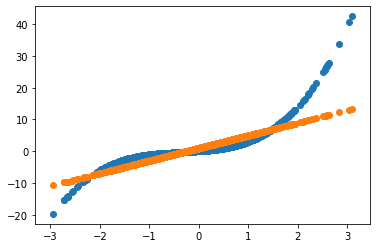

In [22]:
plt.scatter(x_test, y_test)
plt.scatter(x_test,test_output.cpu().detach().numpy())

In [23]:
class FullyConnected(nn.Module):
    def __init__(self):
        super(FullyConnected, self).__init__()
        self.hidden1 = nn.Linear(in_dim,3)
        self.hidden2 = nn.Linear(3,3)
        self.hidden3 = nn.Linear(3,1)

    def forward(self, x):
        x = F.sigmoid( self.hidden1(x))
        x = F.sigmoid( self.hidden2(x))
        x = self.hidden3(x)
        return x


In [24]:
x_test = torch.tensor([np.random.normal(size=in_dim) for i in range(1000)])
y_test = torch.tensor(list(map(unkown_function,x_test)))
FC = FullyConnected()
optimizer = optim.SGD(FC.parameters(), lr=0.05, momentum=0.9)
criterion = nn.MSELoss()
epocs = 1000

for j in range (epocs):
    a= time.time()
    output = FC(x_train.float())
    loss = criterion(output.reshape(y_train.shape), y_train.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    b = time.time()
    if j % 100 == 0 :
      print ("loss: {} step took {}".format(loss,b-a))
      test_output = FC(x_test.float())
      test_loss = criterion(test_output.reshape(y_test.shape), y_test.float())
      print ("test loss: {}".format(test_loss))

/home/dan/anaconda2/envs/tf2_gpu/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


loss: 23.831079483032227 step took 0.012499332427978516
test loss: 23.23651123046875
loss: 3.292142629623413 step took 0.00774073600769043
test loss: 1.8514466285705566
loss: 1.2110867500305176 step took 0.008062601089477539
test loss: 0.4179914593696594
loss: 1.410569429397583 step took 0.008048057556152344
test loss: 0.6356506943702698
loss: 0.6444618105888367 step took 0.008455276489257812
test loss: 0.08589731156826019
loss: 0.49531543254852295 step took 0.008708715438842773
test loss: 0.043214768171310425
loss: 0.5847699046134949 step took 0.008682012557983398
test loss: 0.1964077204465866
loss: 0.3625357449054718 step took 0.007660865783691406
test loss: 0.019788039848208427
loss: 0.31261566281318665 step took 0.008026599884033203
test loss: 0.018231356516480446
loss: 0.297267884016037 step took 0.007145404815673828
test loss: 0.017891524359583855
loss: 0.2587101459503174 step took 0.00821375846862793
test loss: 0.01877698488533497
loss: 0.23373623192310333 step took 0.0083813667

KeyboardInterrupt: 

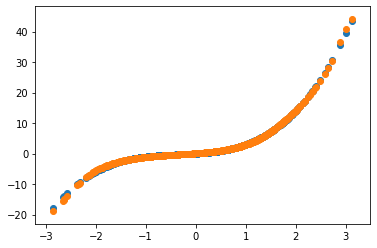

In [25]:
plt.scatter(x_test, y_test)
plt.scatter(x_test,test_output.cpu().detach().numpy())